In [32]:
# Import required libraries
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For statistical data visualization
import numpy as np  # For numerical operations
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score  # For model selection and evaluation
from sklearn.neighbors import KNeighborsClassifier  # For k-nearest neighbors classification
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, make_scorer  # For model evaluation metrics
from sklearn.preprocessing import StandardScaler, LabelBinarizer, OneHotEncoder, label_binarize  # For data preprocessing
from imblearn.over_sampling import SMOTE  # For handling imbalanced datasets
from sklearn.linear_model import LogisticRegression  # For logistic regression modeling
from sklearn.ensemble import RandomForestClassifier  # For random forest classification modeling
from sklearn.svm import SVC  # For support vector machine classification modeling
import shap  # For SHAP (SHapley Additive exPlanations) values
from sklearn.metrics import precision_recall_curve, auc, roc_curve  # For precision-recall and ROC curve analysis
from sklearn.compose import ColumnTransformer  # For applying transformers to columns in a dataset
from sklearn.model_selection import learning_curve  # For plotting learning curves

In [66]:
# 1 Data Collection

# Read data from Excel file into a DataFrame
df = pd.read_excel("PSP_Jan_Feb_2019.xlsx")

# Print column names of the DataFrame
print(df.columns)

Index(['Unnamed: 0', 'tmsp', 'country', 'amount', 'success', 'PSP',
       '3D_secured', 'card'],
      dtype='object')


In [67]:
# 2 Exploratory Data Analysis

# Summary statistics for numerical features
print(df.describe())

# Summary statistics for categorical features
print(df.describe(include=['O']))

         Unnamed: 0        amount       success    3D_secured
count  50410.000000  50410.000000  50410.000000  50410.000000
mean   25204.500000    202.395715      0.202896      0.238266
std    14552.257872     96.274730      0.402160      0.426027
min        0.000000      6.000000      0.000000      0.000000
25%    12602.250000    133.000000      0.000000      0.000000
50%    25204.500000    201.000000      0.000000      0.000000
75%    37806.750000    269.000000      0.000000      0.000000
max    50409.000000    630.000000      1.000000      1.000000
        country      PSP    card
count     50410    50410   50410
unique        3        4       3
top     Germany  UK_Card  Master
freq      30233    26459   29002


In [68]:
# Print information about the DataFrame, including data types and memory usage
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50410 entries, 0 to 50409
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  50410 non-null  int64         
 1   tmsp        50410 non-null  datetime64[ns]
 2   country     50410 non-null  object        
 3   amount      50410 non-null  int64         
 4   success     50410 non-null  int64         
 5   PSP         50410 non-null  object        
 6   3D_secured  50410 non-null  int64         
 7   card        50410 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 3.1+ MB
None


In [69]:
# Determine the data types for each column in the DataFrame
data_types = df.dtypes

# Print the data types information
print(data_types)

Unnamed: 0             int64
tmsp          datetime64[ns]
country               object
amount                 int64
success                int64
PSP                   object
3D_secured             int64
card                  object
dtype: object


In [70]:
# Iterate through each column in the DataFrame
for column in df.columns:
    # Get unique values in the current column
    unique_values = df[column].unique()
    
    # Print the column name and its unique values
    print(f"Column: {column}\nUnique Values: {unique_values}\n")

Column: Unnamed: 0
Unique Values: [    0     1     2 ... 50407 50408 50409]

Column: tmsp
Unique Values: ['2019-01-01T00:01:11.000000000' '2019-01-01T00:01:17.000000000'
 '2019-01-01T00:02:49.000000000' ... '2019-02-28T23:47:04.000000000'
 '2019-02-28T23:47:36.000000000' '2019-02-28T23:48:19.000000000']

Column: country
Unique Values: ['Germany' 'Austria' 'Switzerland']

Column: amount
Unique Values: [ 89 238 124 282 117 174 232 268 205 111 277 137 148 394  84  34 324 251
 100 221 340 257 193  36 146 192  14 175 270 256 310 239  37  56 105 228
 322 367 190 186 121 274 264 132 279 104 184 258 209 260 383 109 161 127
 233 129 243 131 225 246 126  82 329 335 173 222 181  85  62 291 107  78
  22 164 203 113 379 224 242  45 158 140  13 197 215 151 208 116 263 136
 211 180 125 247 376 162 355 135 188  38 144  23 202 212 273 230 141 293
 336 163 350 374 176 218  53 267 255 216 450 301 271 183 198  19 214 147
 368 249  72 315 199 142 262  65  44 169 269 201 118 229 240 339 154 156
  86 250 390

In [71]:
# Print the number of rows in the DataFrame
print("Number of rows in ideal_data set:", len(df))

# Print the number of columns in the DataFrame
print("Number of columns in ideal_data set:", len(df.columns))

Number of rows in ideal_data set: 50410
Number of columns in ideal_data set: 8


In [72]:
# Get the DataFrame's first five rows.
first_five_rows = df.head(5)

# Print the first five rows
print(first_five_rows)


   Unnamed: 0                tmsp  country  amount  success         PSP  \
0           0 2019-01-01 00:01:11  Germany      89        0     UK_Card   
1           1 2019-01-01 00:01:17  Germany      89        1     UK_Card   
2           2 2019-01-01 00:02:49  Germany     238        0     UK_Card   
3           3 2019-01-01 00:03:13  Germany     238        1     UK_Card   
4           4 2019-01-01 00:04:33  Austria     124        0  Simplecard   

   3D_secured    card  
0           0    Visa  
1           0    Visa  
2           1  Diners  
3           1  Diners  
4           0  Diners  


In [73]:
# Get the last five rows of the DataFrame
last_five_rows = df.tail(5)

# Print the last five rows
print(last_five_rows)

       Unnamed: 0                tmsp      country  amount  success  \
50405       50405 2019-02-28 23:45:39  Switzerland     415        0   
50406       50406 2019-02-28 23:46:48      Austria      91        0   
50407       50407 2019-02-28 23:47:04      Austria      91        0   
50408       50408 2019-02-28 23:47:36      Austria      91        0   
50409       50409 2019-02-28 23:48:19      Austria      91        1   

             PSP  3D_secured    card  
50405    UK_Card           0    Visa  
50406    UK_Card           0  Master  
50407    UK_Card           0  Master  
50408    UK_Card           0  Master  
50409  Moneycard           0  Master  


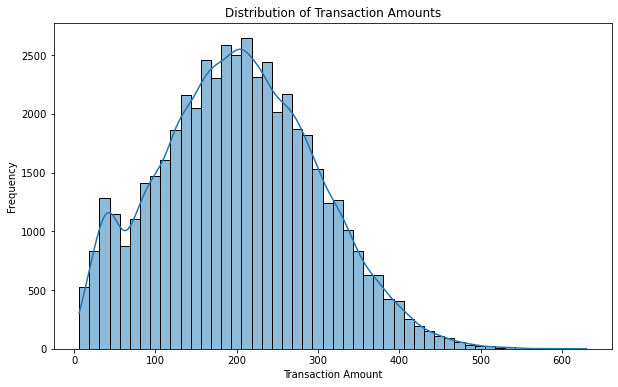

In [74]:
# Plot distribution of transaction amounts
plt.figure(figsize=(10, 6))
sns.histplot(df['amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

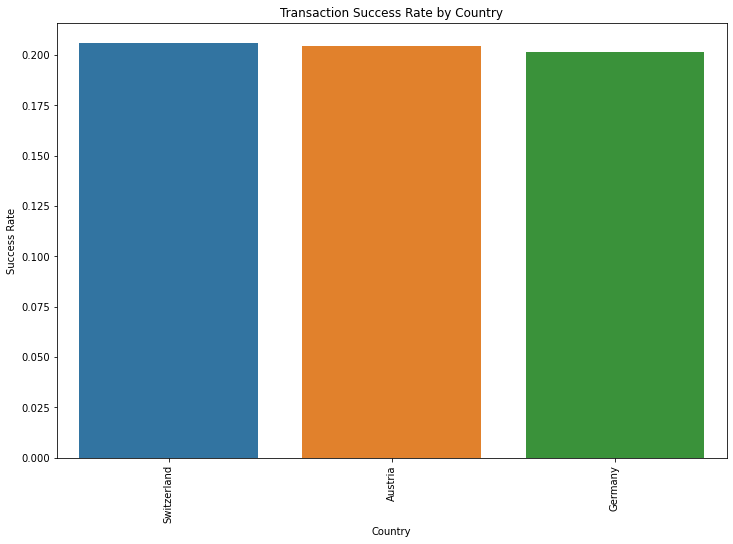

In [75]:
# Calculate success rate by country
success_rate_by_country = df.groupby('country')['success'].mean().sort_values(ascending=False)

# Plot success rate by country
plt.figure(figsize=(12, 8))
sns.barplot(x=success_rate_by_country.index, y=success_rate_by_country.values)
plt.title('Transaction Success Rate by Country')
plt.xlabel('Country')
plt.ylabel('Success Rate')
plt.xticks(rotation=90)
plt.show()

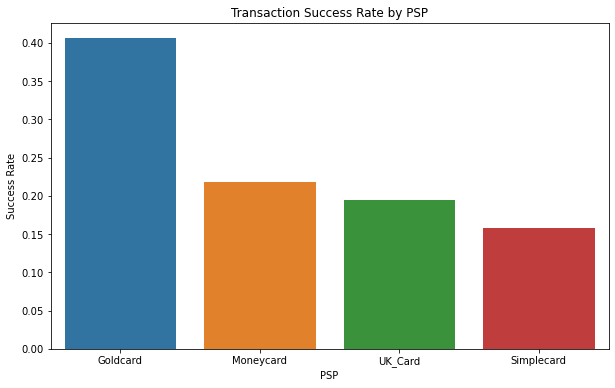

In [76]:
# Calculate success rate by PSP
success_rate_by_psp = df.groupby('PSP')['success'].mean().sort_values(ascending=False)

# Plot success rate by PSP
plt.figure(figsize=(10, 6))
sns.barplot(x=success_rate_by_psp.index, y=success_rate_by_psp.values)
plt.title('Transaction Success Rate by PSP')
plt.xlabel('PSP')
plt.ylabel('Success Rate')
plt.show()


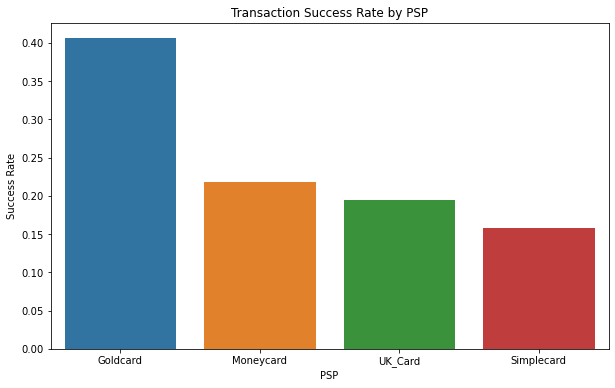

In [77]:
# Calculate success rate by PSP
success_rate_by_psp = df.groupby('PSP')['success'].mean().sort_values(ascending=False)

# Plot success rate by PSP
plt.figure(figsize=(10, 6))
sns.barplot(x=success_rate_by_psp.index, y=success_rate_by_psp.values)
plt.title('Transaction Success Rate by PSP')
plt.xlabel('PSP')
plt.ylabel('Success Rate')
plt.show()


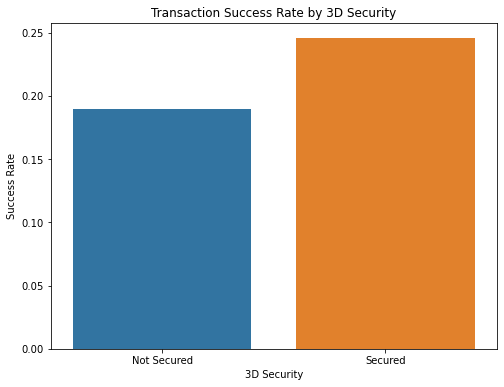

In [78]:
# Calculate success rate by 3D security
success_rate_by_3d_secured = df.groupby('3D_secured')['success'].mean()

# Plot success rate by 3D security
plt.figure(figsize=(8, 6))
sns.barplot(x=success_rate_by_3d_secured.index, y=success_rate_by_3d_secured.values)
plt.title('Transaction Success Rate by 3D Security')
plt.xlabel('3D Security')
plt.ylabel('Success Rate')
plt.xticks([0, 1], ['Not Secured', 'Secured'])
plt.show()


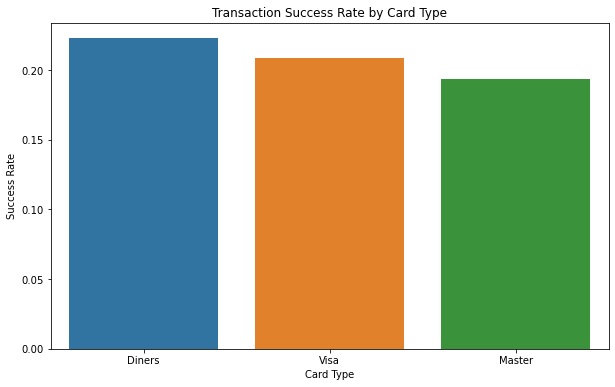

In [79]:
# Calculate success rate by card type
success_rate_by_card = df.groupby('card')['success'].mean().sort_values(ascending=False)

# Plot success rate by card type
plt.figure(figsize=(10, 6))
sns.barplot(x=success_rate_by_card.index, y=success_rate_by_card.values)
plt.title('Transaction Success Rate by Card Type')
plt.xlabel('Card Type')
plt.ylabel('Success Rate')
plt.show()


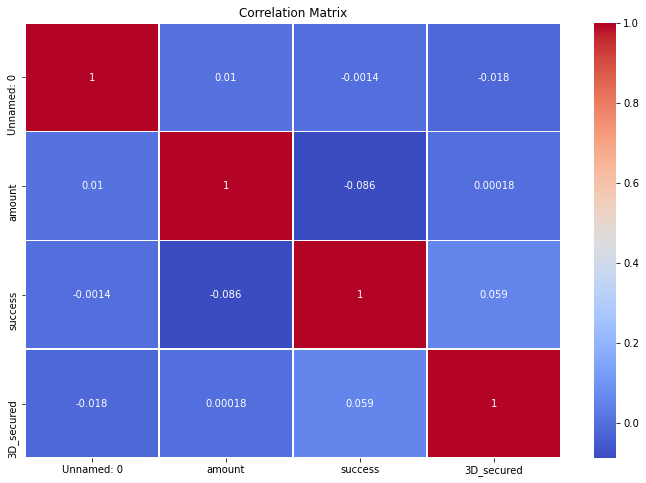

In [80]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Plot correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


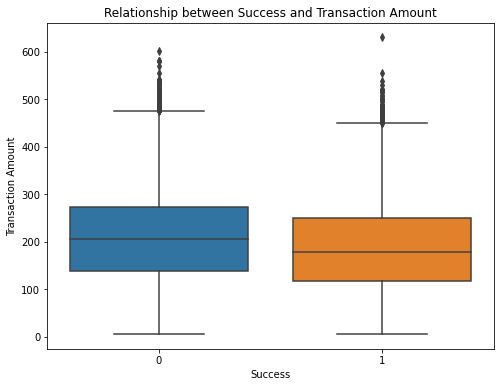

In [81]:
# Visualization of the relationship between success and transaction amount using a boxplot
plt.figure(figsize=(8, 6))

# Create a boxplot with 'success' on the x-axis and 'amount' on the y-axis
sns.boxplot(x='success', y='amount', data=df)

# Set plot title and axis labels
plt.title('Relationship between Success and Transaction Amount')
plt.xlabel('Success')
plt.ylabel('Transaction Amount')

# Show the plot relationship between success and transaction amount
plt.show()

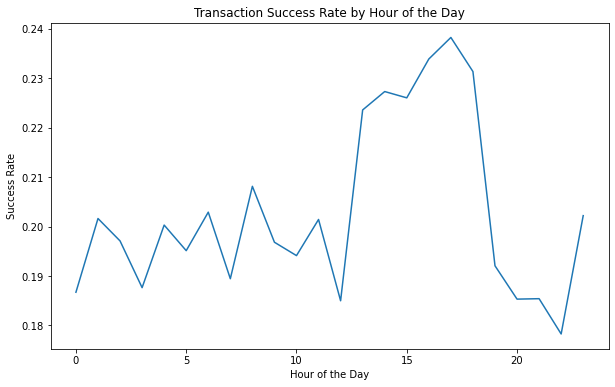

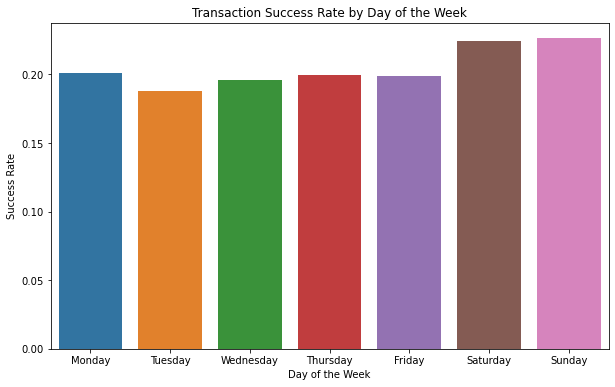

In [82]:
# Convert 'tmsp' column to datetime format
df['tmsp'] = pd.to_datetime(df['tmsp'])

# Add 'day_of_week' column with numerical mapping (Monday 0, ..., Sunday 6)
df['day_of_week'] = df['tmsp'].dt.dayofweek

# Add 'minute_of_day' column
df['minute_of_day'] = df['tmsp'].dt.hour * 60 + df['tmsp'].dt.minute
# Extract hour of the day and day of the week from timestamp
df['hour'] = df['tmsp'].dt.hour
df['day_of_week'] = df['tmsp'].dt.dayofweek

# Calculate success rate by hour of the day
success_rate_by_hour = df.groupby('hour')['success'].mean()

# Plot success rate by hour of the day
plt.figure(figsize=(10, 6))
sns.lineplot(x=success_rate_by_hour.index, y=success_rate_by_hour.values)
plt.title('Transaction Success Rate by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Success Rate')
plt.show()

# Calculate success rate by day of the week
success_rate_by_day_of_week = df.groupby('day_of_week')['success'].mean()

# Plot success rate by day of the week
plt.figure(figsize=(10, 6))
sns.barplot(x=success_rate_by_day_of_week.index, y=success_rate_by_day_of_week.values)
plt.title('Transaction Success Rate by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Success Rate')
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()


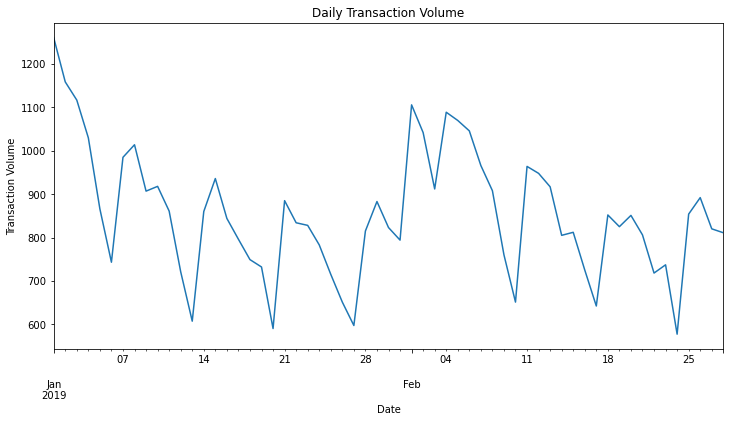

In [83]:
# Set 'tmsp' as the index of the DataFrame
df.set_index('tmsp', inplace=True)

# Resample the data by day and plot the daily transaction volume
df.resample('D').size().plot(title='Daily Transaction Volume', figsize=(12, 6))

# Set x-axis and y-axis labels
plt.xlabel('Date')
plt.ylabel('Transaction Volume')

# Show the plot
plt.show()

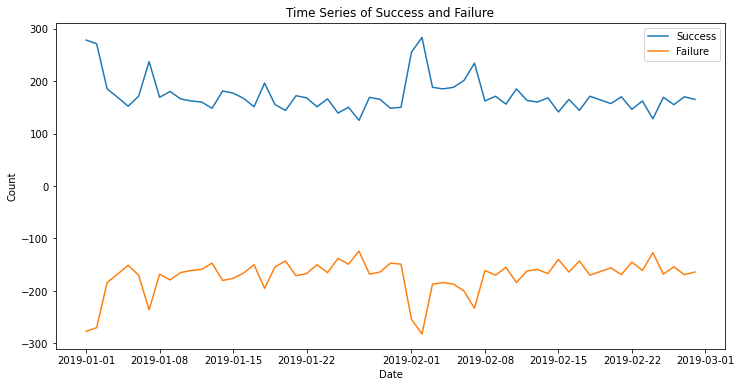

In [84]:
# Resample the DataFrame by day and calculate the sum for each day
df_resampled = df.resample('D').sum()

# Create a line plot for success and failure over time
plt.figure(figsize=(12, 6))

# Use lineplot to plot 'success' and 'failure' against the resampled dates
sns.lineplot(x=df_resampled.index, y='success', data=df_resampled, label='Success')
sns.lineplot(x=df_resampled.index, y=1 - df_resampled['success'], label='Failure')

# Set plot title, x-axis label, y-axis label, and add legend
plt.title('Time Series of Success and Failure')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()

# Show the plot
plt.show()


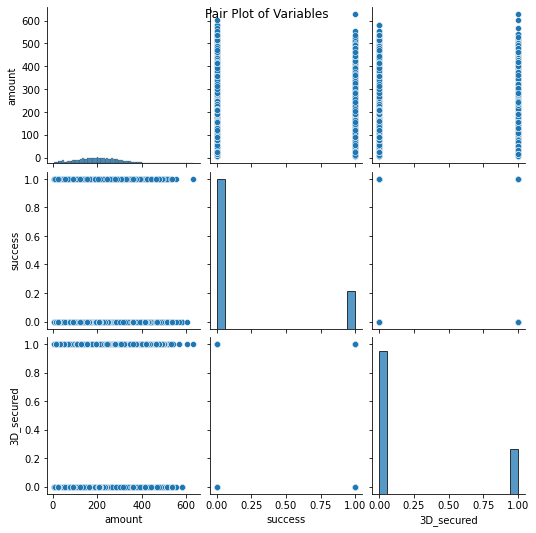

In [85]:
# Create a pair plot for selected variables: 'amount', 'success', and '3D_secured'
sns.pairplot(df[['amount', 'success', '3D_secured']])

# Set the overall title for the pair plot
plt.suptitle('Pair Plot of Variables')

# Show the plot
plt.show()

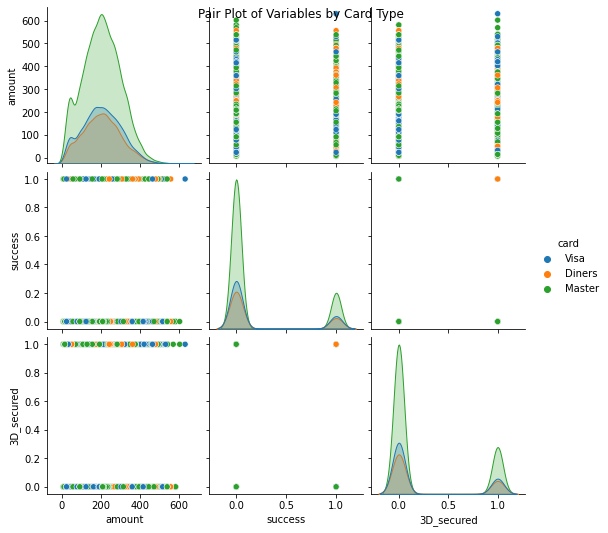

In [86]:
# Create a pair plot for selected variables: 'amount', 'success', and '3D_secured', with hue based on 'card' column
sns.pairplot(df, hue='card', vars=['amount', 'success', '3D_secured'])

# Set the overall title for the pair plot
plt.suptitle('Pair Plot of Variables by Card Type')

# Show the plot
plt.show()

In [87]:
# Data Preprocessing

# Check the number of missing values for each column
missing_values = df.isnull().sum()

# Check the percentage of missing values for each column
percentage_missing = (missing_values / len(df)) * 100

# Create a DataFrame to display the missing values information
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage Missing': percentage_missing
})

# Print the missing values information
print(missing_data)

               Missing Values  Percentage Missing
Unnamed: 0                  0                 0.0
country                     0                 0.0
amount                      0                 0.0
success                     0                 0.0
PSP                         0                 0.0
3D_secured                  0                 0.0
card                        0                 0.0
day_of_week                 0                 0.0
minute_of_day               0                 0.0
hour                        0                 0.0


In [88]:
print(df.columns)

Index(['Unnamed: 0', 'country', 'amount', 'success', 'PSP', '3D_secured',
       'card', 'day_of_week', 'minute_of_day', 'hour'],
      dtype='object')


In [89]:
# Drop the 'Unnamed: 0' column from the DataFrame
df = df.drop('Unnamed: 0', axis=1)
# Display the updated DataFrame
print(df.head())

In [92]:
# Sort the DataFrame by 'country', 'amount', 'day_of_week', 'minute_of_day'
df.sort_values(by=['country', 'amount', 'minute_of_day'], inplace=True)

# Create a new column 'payment_attempts' and initialize it with 1
df['payment_attempts'] = 1

# Identify rows where consecutive attempts have the same 'country', 'amount', 'day_of_week', and 'minute_of_day'
# Increment the 'payment_attempts' for those rows
df['payment_attempts'] = df.groupby(['country', 'amount', 'minute_of_day']).cumcount() + 1

# Reset the DataFrame index
df.reset_index(drop=True, inplace=True)

# Display the updated DataFrame
print(df.head())

   country  amount  success         PSP  3D_secured    card  day_of_week  \
0  Austria       6        0   Moneycard           0  Diners            3   
1  Austria       6        0  Simplecard           0  Diners            3   
2  Austria       6        0     UK_Card           0  Diners            4   
3  Austria       6        0     UK_Card           0  Diners            4   
4  Austria       6        0  Simplecard           0  Diners            4   

   minute_of_day  hour  payment_attempts  
0            229     3                 1  
1            229     3                 2  
2            302     5                 1  
3            302     5                 2  
4            302     5                 3  


In [95]:
# Reset the index of the DataFrame
df.reset_index(inplace=True)

# Define dictionaries for mapping success and failure transaction fees based on card type
success_fee_mapping = {
    'Moneycard': 5,
    'Goldcard': 10,
    'UK_Card': 3,
    'Simplecard': 1
}
failed_fee_mapping = {
    'Moneycard': 2,
    'Goldcard': 5,
    'UK_Card': 1,
    'Simplecard': 0.5
}

# Create a new column 'transaction_fee' based on success or failure, using np.where
df['transaction_fee'] = np.where(df['success'] == 1, df['PSP'].map(success_fee_mapping), df['PSP'].map(failed_fee_mapping))

# Print the first few rows of the updated DataFrame
print(df.head())

   index  country  amount  success         PSP  3D_secured    card  \
0      0  Austria       6        0   Moneycard           0  Diners   
1      1  Austria       6        0  Simplecard           0  Diners   
2      2  Austria       6        0     UK_Card           0  Diners   
3      3  Austria       6        0     UK_Card           0  Diners   
4      4  Austria       6        0  Simplecard           0  Diners   

   day_of_week  minute_of_day  hour  payment_attempts  transaction_fee  
0            3            229     3                 1              2.0  
1            3            229     3                 2              0.5  
2            4            302     5                 1              1.0  
3            4            302     5                 2              1.0  
4            4            302     5                 3              0.5  


                   count      mean       std  min  25%  50%  75%   max
transaction_fee  50410.0  1.756477  1.814051  0.5  1.0  1.0  2.0  10.0


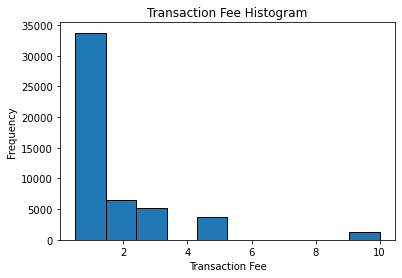

In [97]:
# Select numeric columns for summary statistics
numeric_columns = ['transaction_fee']

# Calculate descriptive statistics for numeric columns
numeric_summary = df[numeric_columns].describe()

# Transpose the summary for better readability
transposed_summary = numeric_summary.transpose()

# Print the transposed summary
print(transposed_summary)

# Create a histogram to visualize the distribution of transaction fees
plt.hist(df['transaction_fee'], bins=10, edgecolor='black')

# Set plot title, x-axis label, y-axis label
plt.title('Transaction Fee Histogram')
plt.xlabel('Transaction Fee')
plt.ylabel('Frequency')

# Show the plot
plt.show()


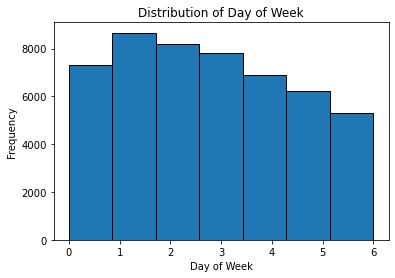

In [98]:
# Create a histogram to visualize the distribution of 'day_of_week'
plt.hist(df['day_of_week'], bins=7, edgecolor='black')

# Set x-axis label, y-axis label, and plot title
plt.xlabel('Day of Week')
plt.ylabel('Frequency')
plt.title('Distribution of Day of Week')

# Show the plot
plt.show()

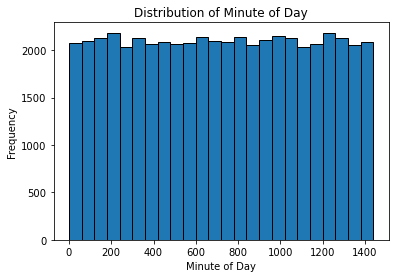

In [99]:
# Create a histogram to visualize the distribution of 'minute_of_day'
plt.hist(df['minute_of_day'], bins=24, edgecolor='black')

# Set x-axis label, y-axis label, and plot title
plt.xlabel('Minute of Day')
plt.ylabel('Frequency')
plt.title('Distribution of Minute of Day')

# Show the plot
plt.show()


1    37227
2    10463
3     2228
4      412
5       67
6       10
7        3
Name: payment_attempts, dtype: int64


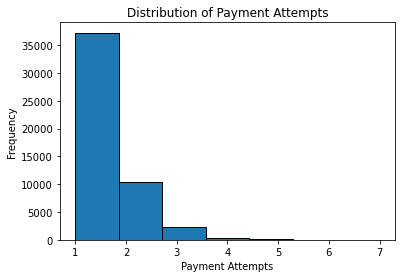

In [100]:
# Count the occurrences of each value in the 'payment_attempts' column and sort by index
attempt_counts = df['payment_attempts'].value_counts().sort_index()

# Print the count of payment attempts for each value
print(attempt_counts)

# Create a histogram to visualize the distribution of 'payment_attempts'
plt.hist(df['payment_attempts'], bins=7, edgecolor='black')

# Set x-axis label, y-axis label, and plot title
plt.xlabel('Payment Attempts')
plt.ylabel('Frequency')
plt.title('Distribution of Payment Attempts')

# Show the plot
plt.show()

In [101]:
# Examine unique values in 'country' column
unique_countries = df['country'].unique()
print("Unique values in 'country' column:", unique_countries)

# Examine unique values in 'PSP' column
unique_psps = df['PSP'].unique()
print("Unique values in 'PSP' column:", unique_psps)

# Examine unique values in 'card' column
unique_cards = df['card'].unique()
print("Unique values in 'card' column:", unique_cards)

Unique values in 'country' column: ['Austria' 'Germany' 'Switzerland']
Unique values in 'PSP' column: ['Moneycard' 'Simplecard' 'UK_Card' 'Goldcard']
Unique values in 'card' column: ['Diners' 'Master' 'Visa']


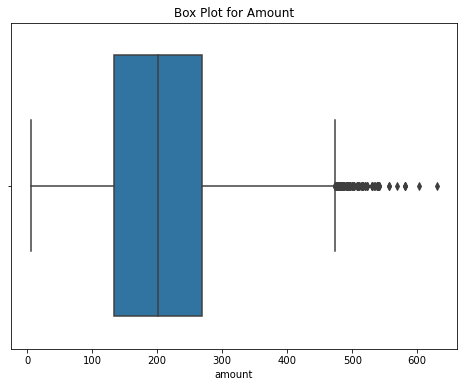

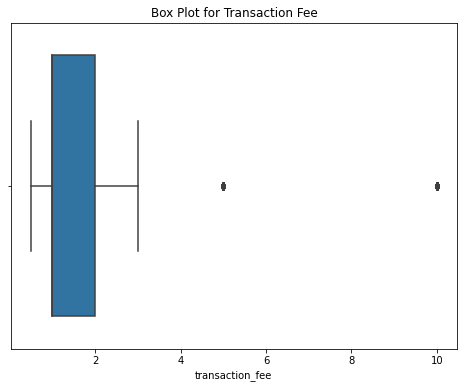

In [102]:
# Box plot for 'amount'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['amount'])
plt.title('Box Plot for Amount')
plt.show()

# Box plot for 'transaction_fee'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['transaction_fee'])
plt.title('Box Plot for Transaction Fee')
plt.show()

In [103]:
# Set a threshold for identifying rare categories
threshold = 10

# Identify rare categories for 'country', 'PSP', and 'card'
rare_country = df['country'].value_counts()[df['country'].value_counts() < threshold].index
rare_PSP = df['PSP'].value_counts()[df['PSP'].value_counts() < threshold].index
rare_card = df['card'].value_counts()[df['card'].value_counts() < threshold].index

# Print the rare categories
print("Rare countries:", rare_country)
print("Rare PSPs:", rare_PSP)
print("Rare cards:", rare_card)

Rare countries: Index([], dtype='object')
Rare PSPs: Index([], dtype='object')
Rare cards: Index([], dtype='object')


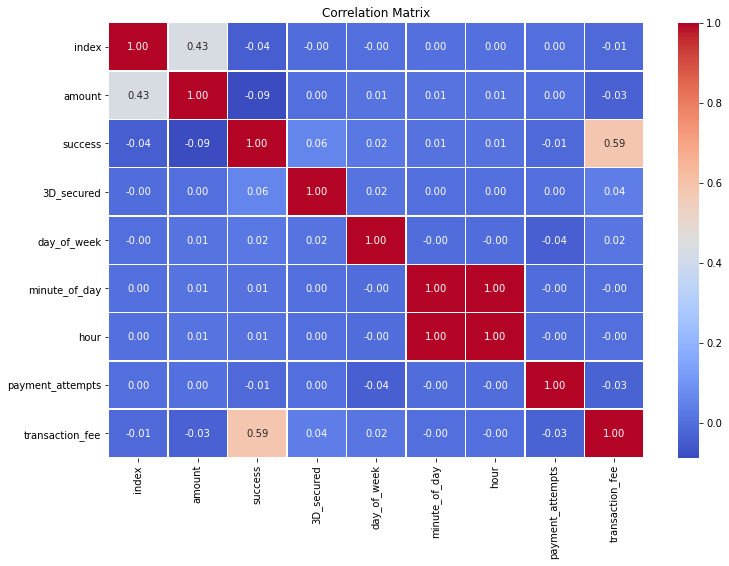

In [104]:
# Calculate correlations between variables
correlation_matrix = df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [105]:
# Create a copy of the DataFrame
df_1 = df.copy()

# Drop the 'transaction_fee' column from the copied DataFrame
df_1 = df_1.drop('transaction_fee', axis=1)

# Print the modified DataFrame without the 'transaction_fee' column
print(df_1)

       index      country  amount  success         PSP  3D_secured    card  \
0          0      Austria       6        0   Moneycard           0  Diners   
1          1      Austria       6        0  Simplecard           0  Diners   
2          2      Austria       6        0     UK_Card           0  Diners   
3          3      Austria       6        0     UK_Card           0  Diners   
4          4      Austria       6        0  Simplecard           0  Diners   
...      ...          ...     ...      ...         ...         ...     ...   
50405  50405  Switzerland     499        0     UK_Card           0  Master   
50406  50406  Switzerland     499        0     UK_Card           0  Master   
50407  50407  Switzerland     499        0     UK_Card           0  Master   
50408  50408  Switzerland     499        0     UK_Card           0  Master   
50409  50409  Switzerland     499        0     UK_Card           0  Master   

       day_of_week  minute_of_day  hour  payment_attempts  
0  

In [106]:
# Encode categorical variables using one-hot encoding
df_1 = pd.get_dummies(df_1, columns=['country', 'PSP', 'card'])

# Print the DataFrame after one-hot encoding
print(df_1)


       index  amount  success  3D_secured  day_of_week  minute_of_day  hour  \
0          0       6        0           0            3            229     3   
1          1       6        0           0            3            229     3   
2          2       6        0           0            4            302     5   
3          3       6        0           0            4            302     5   
4          4       6        0           0            4            302     5   
...      ...     ...      ...         ...          ...            ...   ...   
50405  50405     499        0           0            3            247     4   
50406  50406     499        0           0            3            247     4   
50407  50407     499        0           0            3            248     4   
50408  50408     499        0           0            3            248     4   
50409  50409     499        0           0            3            249     4   

       payment_attempts  country_Austria  country_G

In [107]:
# Drop the target variable 'success' from the features
X = df_1.drop('success', axis=1)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the features using StandardScaler
X_scaled = scaler.fit_transform(X)

# Create a DataFrame with scaled features and include the 'success' column
df_1_scaled = pd.DataFrame(X_scaled, columns=X.columns)
df_1_scaled['success'] = df_1['success']

# Print the DataFrame with scaled features
print(df_1_scaled)

          index    amount  3D_secured  day_of_week  minute_of_day      hour  \
0     -1.732016 -2.039971    -0.55928     0.125262      -1.180246 -1.228077   
1     -1.731948 -2.039971    -0.55928     0.125262      -1.180246 -1.228077   
2     -1.731879 -2.039971    -0.55928     0.646728      -1.004572 -0.939079   
3     -1.731810 -2.039971    -0.55928     0.646728      -1.004572 -0.939079   
4     -1.731742 -2.039971    -0.55928     0.646728      -1.004572 -0.939079   
...         ...       ...         ...          ...            ...       ...   
50405  1.731742  3.080842    -0.55928     0.125262      -1.136929 -1.083578   
50406  1.731810  3.080842    -0.55928     0.125262      -1.136929 -1.083578   
50407  1.731879  3.080842    -0.55928     0.125262      -1.134522 -1.083578   
50408  1.731948  3.080842    -0.55928     0.125262      -1.134522 -1.083578   
50409  1.732016  3.080842    -0.55928     0.125262      -1.132116 -1.083578   

       payment_attempts  country_Austria  country_G

In [108]:
# Extract features and target variable for SMOTE
X_smote = df_1_scaled.drop('success', axis=1)
y_smote = df_1_scaled['success']

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_smote, y_smote)

# Create a new DataFrame with the resampled features and the target variable
df_1_resampled = pd.DataFrame(X_resampled, columns=X_smote.columns)
df_1_resampled['success'] = y_resampled

# Display the updated DataFrame with SMOTE
print(df_1_resampled)

          index    amount  3D_secured  day_of_week  minute_of_day      hour  \
0     -1.732016 -2.039971   -0.559280     0.125262      -1.180246 -1.228077   
1     -1.731948 -2.039971   -0.559280     0.125262      -1.180246 -1.228077   
2     -1.731879 -2.039971   -0.559280     0.646728      -1.004572 -0.939079   
3     -1.731810 -2.039971   -0.559280     0.646728      -1.004572 -0.939079   
4     -1.731742 -2.039971   -0.559280     0.646728      -1.004572 -0.939079   
...         ...       ...         ...          ...            ...       ...   
80359 -1.531957 -0.585814    1.788012    -0.636222      -0.419815 -0.416112   
80360  1.159707 -0.915628    1.788012     1.224951       1.471165  1.533129   
80361 -1.020980 -1.842408   -0.559280     1.583271       0.853182  0.824388   
80362  0.285725  0.367156   -0.559280     1.622711      -1.228197 -1.228077   
80363 -1.267911  0.487185   -0.559280     1.071835       0.861818  0.821609   

       payment_attempts  country_Austria  country_G

In [42]:
# Development of Model 1

# Split the resampled dataset into features (X_1) and target variable (y_1)
X_1 = df_1_resampled.drop('success', axis=1)
y_1 = df_1_resampled['success']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size=0.2, random_state=42)
     

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


# Data Preprocessing
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model initialization
model = LogisticRegression(solver='liblinear')

# Define hyperparameters for grid search
param_grid = {'penalty': ['l1', 'l2'], 'C': [0.1, 1, 10]}

# Perform grid search
grid_search = GridSearchCV(model, param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train_scaled, y_train)
best_model = grid_search.best_estimator_

# Evaluate the best model on the training set
y_train_pred = best_model.predict(X_train_scaled)
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred, average='weighted')
recall_train = recall_score(y_train, y_train_pred, average='weighted')
f1_score_train = f1_score(y_train, y_train_pred, average='weighted')
cm_train = confusion_matrix(y_train, y_train_pred)

# Evaluate the best model on the testing set
y_test_pred = best_model.predict(X_test_scaled)
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred, average='weighted')
recall_test = recall_score(y_test, y_test_pred, average='weighted')
f1_score_test = f1_score(y_test, y_test_pred, average='weighted')
cm_test = confusion_matrix(y_test, y_test_pred)

# Print evaluation metrics and confusion matrix for training set
print("Training set:")
print("Accuracy:", accuracy_train)
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1 Score:", f1_score_train)
print("Confusion Matrix:")
print(cm_train)

# Print evaluation metrics and confusion matrix for testing set
print("Testing set:")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_score_test)
print("Confusion Matrix:")
print(cm_test)

Training set:
Accuracy: 0.5836586769532283
Precision: 0.5844213728354569
Recall: 0.5836586769532283
F1 Score: 0.5827818749648903
Confusion Matrix:
[[20220 11894]
 [14873 17304]]
Testing set:
Accuracy: 0.5823430597897095
Precision: 0.5830822059833738
Recall: 0.5823430597897095
F1 Score: 0.5811100508403998
Confusion Matrix:
[[5132 2936]
 [3777 4228]]


In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Data Preprocessing
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model initialization
model = GaussianNB()

# Define hyperparameters for grid search
param_grid = {}  # No hyperparameters for Gaussian Naive Bayes

# Perform grid search
grid_search = GridSearchCV(model, param_grid, scoring='f1', cv=5)
grid_search.fit(X_train_scaled, y_train)
best_model = grid_search.best_estimator_

# Evaluate the best model on the training set
y_train_pred = best_model.predict(X_train_scaled)
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred, average='weighted')
recall_train = recall_score(y_train, y_train_pred, average='weighted')
f1_score_train = f1_score(y_train, y_train_pred, average='weighted')
cm_train = confusion_matrix(y_train, y_train_pred)

# Evaluate the best model on the testing set
y_test_pred = best_model.predict(X_test_scaled)
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred, average='weighted')
recall_test = recall_score(y_test, y_test_pred, average='weighted')
f1_score_test = f1_score(y_test, y_test_pred, average='weighted')
cm_test = confusion_matrix(y_test, y_test_pred)

# Print evaluation metrics and confusion matrix for training set
print("Training set:")
print("Accuracy:", accuracy_train)
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1 Score:", f1_score_train)
print("Confusion Matrix:")
print(cm_train)

# Print evaluation metrics and confusion matrix for testing set
print("Testing set:")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_score_test)
print("Confusion Matrix:")
print(cm_test)

Training set:
Accuracy: 0.5599695136177693
Precision: 0.5805271107123822
Recall: 0.5599695136177693
F1 Score: 0.5304088146531213
Confusion Matrix:
[[26051  6063]
 [22227  9950]]
Testing set:
Accuracy: 0.5578299010763392
Precision: 0.5772044942501021
Recall: 0.5578299010763392
F1 Score: 0.5263691870217129
Confusion Matrix:
[[6569 1499]
 [5608 2397]]


In [44]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Create an XGBoost classifier
clf = xgb.XGBClassifier()

# Train the classifier
clf.fit(X_train_scaled, y_train)

# Predict the target variable for the training and testing sets
y_train_pred = clf.predict(X_train_scaled)
y_test_pred = clf.predict(X_test_scaled)

# Compute evaluation metrics for the training set
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred, average='weighted')
recall_train = recall_score(y_train, y_train_pred, average='weighted')
f1_score_train = f1_score(y_train, y_train_pred, average='weighted')

# Compute evaluation metrics for the testing set
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred, average='weighted')
recall_test = recall_score(y_test, y_test_pred, average='weighted')
f1_score_test = f1_score(y_test, y_test_pred, average='weighted')

# Compute confusion matrix for the training and testing sets
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Print evaluation metrics and confusion matrix
print("Training set:")
print("Accuracy:", accuracy_train)
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1 Score:", f1_score_train)
print("Confusion Matrix:")
print(cm_train)
print("")

print("Testing set:")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_score_test)
print("Confusion Matrix:")
print(cm_test)

Training set:
Accuracy: 0.7807935791945996
Precision: 0.7829914649525462
Recall: 0.7807935791945996
F1 Score: 0.7803801984676336
Confusion Matrix:
[[26478  5636]
 [ 8457 23720]]

Testing set:
Accuracy: 0.7332171965407827
Precision: 0.7358203399893781
Recall: 0.7332171965407827
F1 Score: 0.7323910564287933
Confusion Matrix:
[[6355 1713]
 [2575 5430]]


In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Create a Decision Tree classifier
clf = DecisionTreeClassifier()

# Train the classifier
clf.fit(X_train_scaled, y_train)

# Predict the target variable for the training and testing sets
y_train_pred = clf.predict(X_train_scaled)
y_test_pred = clf.predict(X_test_scaled)

# Compute evaluation metrics for the training set
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred, average='weighted')
recall_train = recall_score(y_train, y_train_pred, average='weighted')
f1_score_train = f1_score(y_train, y_train_pred, average='weighted')

# Compute evaluation metrics for the testing set
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred, average='weighted')
recall_test = recall_score(y_test, y_test_pred, average='weighted')
f1_score_test = f1_score(y_test, y_test_pred, average='weighted')

# Compute confusion matrix for the training and testing sets
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Print evaluation metrics and confusion matrix
print("Training set:")
print("Accuracy:", accuracy_train)
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1 Score:", f1_score_train)
print("Confusion Matrix:")
print(cm_train)
print("")

print("Testing set:")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_score_test)
print("Confusion Matrix:")
print(cm_test)

Training set:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
[[32114     0]
 [    0 32177]]

Testing set:
Accuracy: 0.75169538978411
Precision: 0.7516944740029501
Recall: 0.75169538978411
F1 Score: 0.7516944401472829
Confusion Matrix:
[[6079 1989]
 [2002 6003]]


In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Create a Random Forest classifier
clf = RandomForestClassifier()

# Train the classifier
clf.fit(X_train_scaled, y_train)

# Predict the target variable for the training and testing sets
y_train_pred = clf.predict(X_train_scaled)
y_test_pred = clf.predict(X_test_scaled)

# Compute evaluation metrics for the training set
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred, average='weighted')
recall_train = recall_score(y_train, y_train_pred, average='weighted')
f1_score_train = f1_score(y_train, y_train_pred, average='weighted')

# Compute evaluation metrics for the testing set
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred, average='weighted')
recall_test = recall_score(y_test, y_test_pred, average='weighted')
f1_score_test = f1_score(y_test, y_test_pred, average='weighted')

# Compute confusion matrix for the training and testing sets
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Print evaluation metrics and confusion matrix
print("Training set:")
print("Accuracy:", accuracy_train)
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1 Score:", f1_score_train)
print("Confusion Matrix:")
print(cm_train)
print("")

print("Testing set:")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_score_test)
print("Confusion Matrix:")
print(cm_test)

Training set:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
[[32114     0]
 [    0 32177]]

Testing set:
Accuracy: 0.803894730293038
Precision: 0.803906889153571
Recall: 0.803894730293038
F1 Score: 0.8038888469611949
Confusion Matrix:
[[6523 1545]
 [1607 6398]]


In [47]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Create a Gradient Boosting classifier
clf = GradientBoostingClassifier()

# Train the classifier
clf.fit(X_train_scaled, y_train)

# Predict the target variable for the training and testing sets
y_train_pred = clf.predict(X_train_scaled)
y_test_pred = clf.predict(X_test_scaled)

# Compute evaluation metrics for the training set
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred, average='weighted')
recall_train = recall_score(y_train, y_train_pred, average='weighted')
f1_score_train = f1_score(y_train, y_train_pred, average='weighted')

# Compute evaluation metrics for the testing set
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred, average='weighted')
recall_test = recall_score(y_test, y_test_pred, average='weighted')
f1_score_test = f1_score(y_test, y_test_pred, average='weighted')

# Compute confusion matrix for the training and testing sets
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Print evaluation metrics and confusion matrix
print("Training set:")
print("Accuracy:", accuracy_train)
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1 Score:", f1_score_train)
print("Confusion Matrix:")
print(cm_train)
print("")

print("Testing set:")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_score_test)
print("Confusion Matrix:")
print(cm_test)

Training set:
Accuracy: 0.713894635329984
Precision: 0.7165783888948645
Recall: 0.713894635329984
F1 Score: 0.7130313306178222
Confusion Matrix:
[[24696  7418]
 [10976 21201]]

Testing set:
Accuracy: 0.7122503577427984
Precision: 0.7149102580637975
Recall: 0.7122503577427984
F1 Score: 0.7112499160797833
Confusion Matrix:
[[6213 1855]
 [2770 5235]]


In [48]:
# Drop 'success' and 'transaction_fee' columns from the original DataFrame
X_original = df.drop(['success', 'transaction_fee'], axis=1)

# One-hot encode categorical columns: 'country', 'PSP', 'card'
X_original_encoded = pd.get_dummies(X_original, columns=['country', 'PSP', 'card'])

# Identify additional columns in X_original_encoded not present in X_train_1
additional_columns = set(X_original_encoded.columns) - set(X_train.columns)
if additional_columns:
    print(f"Additional columns in X_original_encoded: {additional_columns}")

# Identify missing columns in X_original_encoded compared to X_train_1
missing_columns = set(X_train.columns) - set(X_original_encoded.columns)
if missing_columns:
    print(f"Missing columns in X_original_encoded: {missing_columns}")

# Keep only columns present in X_train_1 in X_original_encoded
X_original_encoded = X_original_encoded[X_train.columns]

# Scale the features using the previously defined 'scaler'
X_original_scaled = scaler.transform(X_original_encoded)

# Predict success probabilities using the trained random forest Model 1
success_probabilities = clf.predict_proba(X_original_scaled)[:, 1]

# Add the success probabilities as a new column to the original DataFrame
df['success_probabilities'] = success_probabilities

# Display the updated DataFrame
print(df)

           country  amount  success         PSP  3D_secured    card  \
0          Austria       6        0   Moneycard           0  Diners   
1          Austria       6        0  Simplecard           0  Diners   
2          Austria       6        0     UK_Card           0  Diners   
3          Austria       6        0     UK_Card           0  Diners   
4          Austria       6        0  Simplecard           0  Diners   
...            ...     ...      ...         ...         ...     ...   
50405  Switzerland     499        0     UK_Card           0  Master   
50406  Switzerland     499        0     UK_Card           0  Master   
50407  Switzerland     499        0     UK_Card           0  Master   
50408  Switzerland     499        0     UK_Card           0  Master   
50409  Switzerland     499        0     UK_Card           0  Master   

       transaction_fee  day_of_week  minute_of_day  payment_attempts  \
0                  2.0            3            229                 1   
1  

In [49]:

# Create a copy of the DataFrame
df_2 = df.copy()

# Print the copied DataFrame
print(df_2)

           country  amount  success         PSP  3D_secured    card  \
0          Austria       6        0   Moneycard           0  Diners   
1          Austria       6        0  Simplecard           0  Diners   
2          Austria       6        0     UK_Card           0  Diners   
3          Austria       6        0     UK_Card           0  Diners   
4          Austria       6        0  Simplecard           0  Diners   
...            ...     ...      ...         ...         ...     ...   
50405  Switzerland     499        0     UK_Card           0  Master   
50406  Switzerland     499        0     UK_Card           0  Master   
50407  Switzerland     499        0     UK_Card           0  Master   
50408  Switzerland     499        0     UK_Card           0  Master   
50409  Switzerland     499        0     UK_Card           0  Master   

       transaction_fee  day_of_week  minute_of_day  payment_attempts  \
0                  2.0            3            229                 1   
1  

In [50]:
# Create a copy of the DataFrame
df_2 = df.copy()

# Print the copied DataFrame
print(df_2)

           country  amount  success         PSP  3D_secured    card  \
0          Austria       6        0   Moneycard           0  Diners   
1          Austria       6        0  Simplecard           0  Diners   
2          Austria       6        0     UK_Card           0  Diners   
3          Austria       6        0     UK_Card           0  Diners   
4          Austria       6        0  Simplecard           0  Diners   
...            ...     ...      ...         ...         ...     ...   
50405  Switzerland     499        0     UK_Card           0  Master   
50406  Switzerland     499        0     UK_Card           0  Master   
50407  Switzerland     499        0     UK_Card           0  Master   
50408  Switzerland     499        0     UK_Card           0  Master   
50409  Switzerland     499        0     UK_Card           0  Master   

       transaction_fee  day_of_week  minute_of_day  payment_attempts  \
0                  2.0            3            229                 1   
1  

In [51]:
# Encode categorical variables using one-hot encoding
df_encoded_2 = pd.get_dummies(df_2, columns=['country', 'card'])

# Print the DataFrame after one-hot encoding
print(df_encoded_2)

       amount  success         PSP  3D_secured  transaction_fee  day_of_week  \
0           6        0   Moneycard           0              2.0            3   
1           6        0  Simplecard           0              0.5            3   
2           6        0     UK_Card           0              1.0            4   
3           6        0     UK_Card           0              1.0            4   
4           6        0  Simplecard           0              0.5            4   
...       ...      ...         ...         ...              ...          ...   
50405     499        0     UK_Card           0              1.0            3   
50406     499        0     UK_Card           0              1.0            3   
50407     499        0     UK_Card           0              1.0            3   
50408     499        0     UK_Card           0              1.0            3   
50409     499        0     UK_Card           0              1.0            3   

       minute_of_day  payment_attempts 

In [52]:

# Drop the target variables 'PSP' and 'success' from the features
X_2 = df_encoded_2.drop(['PSP', 'success'], axis=1)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the features using StandardScaler
X_scaled_2 = scaler.fit_transform(X_2)

# Create a DataFrame with scaled features and include the 'PSP' column
df_scaled_2 = pd.DataFrame(X_scaled_2, columns=X_2.columns)
df_scaled_2[['PSP']] = df_encoded_2[['PSP']]

# Print the DataFrame with scaled features
print(df_scaled_2)

         amount  3D_secured  transaction_fee  day_of_week  minute_of_day  \
0     -2.039971    -0.55928         0.134244     0.125262      -1.180246   
1     -2.039971    -0.55928        -0.692643     0.125262      -1.180246   
2     -2.039971    -0.55928        -0.417014     0.646728      -1.004572   
3     -2.039971    -0.55928        -0.417014     0.646728      -1.004572   
4     -2.039971    -0.55928        -0.692643     0.646728      -1.004572   
...         ...         ...              ...          ...            ...   
50405  3.080842    -0.55928        -0.417014     0.125262      -1.136929   
50406  3.080842    -0.55928        -0.417014     0.125262      -1.136929   
50407  3.080842    -0.55928        -0.417014     0.125262      -1.134522   
50408  3.080842    -0.55928        -0.417014     0.125262      -1.134522   
50409  3.080842    -0.55928        -0.417014     0.125262      -1.132116   

       payment_attempts  success_probabilities  country_Austria  \
0             -0.531

In [53]:

# Drop the target variables 'PSP' and 'success' from the features
X_2 = df_encoded_2.drop(['PSP', 'success'], axis=1)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the features using StandardScaler
X_scaled_2 = scaler.fit_transform(X_2)

# Create a DataFrame with scaled features and include the 'PSP' column
df_scaled_2 = pd.DataFrame(X_scaled_2, columns=X_2.columns)
df_scaled_2[['PSP']] = df_encoded_2[['PSP']]

# Print the DataFrame with scaled features
print(df_scaled_2)

         amount  3D_secured  transaction_fee  day_of_week  minute_of_day  \
0     -2.039971    -0.55928         0.134244     0.125262      -1.180246   
1     -2.039971    -0.55928        -0.692643     0.125262      -1.180246   
2     -2.039971    -0.55928        -0.417014     0.646728      -1.004572   
3     -2.039971    -0.55928        -0.417014     0.646728      -1.004572   
4     -2.039971    -0.55928        -0.692643     0.646728      -1.004572   
...         ...         ...              ...          ...            ...   
50405  3.080842    -0.55928        -0.417014     0.125262      -1.136929   
50406  3.080842    -0.55928        -0.417014     0.125262      -1.136929   
50407  3.080842    -0.55928        -0.417014     0.125262      -1.134522   
50408  3.080842    -0.55928        -0.417014     0.125262      -1.134522   
50409  3.080842    -0.55928        -0.417014     0.125262      -1.132116   

       payment_attempts  success_probabilities  country_Austria  \
0             -0.531

In [54]:

# Split the scaled DataFrame into features (X_smote_2) and target variable (y_smote_2)
X_smote_2 = df_scaled_2.drop('PSP', axis=1)
y_smote_2 = df_scaled_2['PSP']

# Initialize the SMOTE with a random state
smote_2 = SMOTE(random_state=42)

# Resample the dataset using SMOTE
X_resampled_2, y_resampled_2 = smote_2.fit_resample(X_smote_2, y_smote_2)

# Create a DataFrame with resampled features and include the 'PSP' column
df_2_resampled = pd.DataFrame(X_resampled_2, columns=X_smote_2.columns)
df_2_resampled['PSP'] = y_resampled_2

# Print the resampled DataFrame
print(df_2_resampled)

          amount  3D_secured  transaction_fee  day_of_week  minute_of_day  \
0      -2.039971   -0.559280         0.134244     0.125262      -1.180246   
1      -2.039971   -0.559280        -0.692643     0.125262      -1.180246   
2      -2.039971   -0.559280        -0.417014     0.646728      -1.004572   
3      -2.039971   -0.559280        -0.417014     0.646728      -1.004572   
4      -2.039971   -0.559280        -0.692643     0.646728      -1.004572   
...          ...         ...              ...          ...            ...   
105831 -1.828316   -0.559280        -0.692643    -1.439138      -1.383791   
105832 -1.159684    1.788012        -0.692643     1.168195      -1.536938   
105833 -0.085479   -0.559280        -0.661659    -0.396205       0.147578   
105834 -0.412413   -0.559280        -0.692643    -0.917672       1.224076   
105835  1.366484   -0.559280        -0.692643    -0.917672       0.359207   

        payment_attempts  success_probabilities  country_Austria  \
0      

In [55]:

# Split the resampled DataFrame into features (X_2) and target variable (y_2)
X_2 = df_2_resampled.drop('PSP', axis=1)
y_2 = df_2_resampled['PSP']

# Split the dataset into train, validation, and test sets
X_train_2, X_temp_2, y_train_2, y_temp_2 = train_test_split(X_2, y_2, test_size=0.2, random_state=42)
X_valid_2, X_test_2, y_valid_2, y_test_2 = train_test_split(X_temp_2, y_temp_2, test_size=0.5, random_state=42)

# Normalize Data
scaler = StandardScaler()
X_train_scaled_2 = scaler.fit_transform(X_train_2)
X_valid_scaled_2 = scaler.transform(X_valid_2)
X_test_scaled_2 = scaler.transform(X_test_2)


In [109]:

def evaluate_model(model, X, y, set_name):
    # Make predictions on the data
    y_pred = model.predict(X)

    # Extract the values of the target variable
    y_values = y.values.ravel()  # Convert DataFrame to 1D array

    # Calculate and print relevant evaluation metrics
    precision = precision_score(y_values, y_pred, average='weighted')
    recall = recall_score(y_values, y_pred, average='weighted')
    f1 = f1_score(y_values, y_pred, average='weighted')

    # For binary classification, set multi_class to 'ovr'
    if len(model.classes_) == 2:
        roc_auc = roc_auc_score(y_values, model.predict_proba(X)[:, 1], average='weighted')
    else:
        roc_auc = roc_auc_score(pd.get_dummies(y_values), model.predict_proba(X), average='weighted', multi_class='ovr')
    
    accuracy = accuracy_score(y_values, y_pred)

    print(f"{set_name} Set Evaluation:")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print(f"Accuracy: {accuracy:.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_values, y_pred))


In [57]:
# Development of Model 2

# Create a Logistic Regression model with specified parameters
logreg_model = LogisticRegression(random_state=42, C=1)

# Perform cross-validation on the training set
cv_scores = cross_val_score(logreg_model, X_train_scaled_2, y_train_2, scoring='f1_weighted', cv=StratifiedKFold(n_splits=5))

# Print cross-validation scores
print("Cross-Validation Scores of Logistic Regression:")
print(cv_scores)
print(f"Average F1 Weighted Score: {cv_scores.mean():.4f}\n")

# Fit the Logistic Regression model on the training set
logreg_model.fit(X_train_scaled_2, y_train_2)

# Print model performance on the validation set
print("Model Performance on Validation set - Logistic Regression:")
evaluate_model(logreg_model, X_valid_scaled_2, y_valid_2, set_name="Validation")

# Print model performance on the test set
print("\nModel Performance on Test set - Logistic Regression:")
evaluate_model(logreg_model, X_test_scaled_2, y_test_2, set_name="Test")

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Cross-Validation Scores of Logistic Regression:
[0.82391457 0.81502941 0.82148954 0.82436383 0.82286389]
Average F1 Weighted Score: 0.8215



lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Model Performance on Validation set - Logistic Regression:
Validation Set Evaluation:
Precision: 0.8269
Recall: 0.8235
F1 Score: 0.8211
ROC AUC: 0.9514
Accuracy: 0.8235
Confusion Matrix:
[[2567   41    0    0]
 [ 518 1626    0  476]
 [   0    0 2322  304]
 [   0  529    0 2201]]

Model Performance on Test set - Logistic Regression:
Test Set Evaluation:
Precision: 0.8241
Recall: 0.8199
F1 Score: 0.8180
ROC AUC: 0.9497
Accuracy: 0.8199
Confusion Matrix:
[[2542   48    0    0]
 [ 502 1641    0  478]
 [   0    0 2316  333]
 [   0  545    0 2179]]


In [58]:
# Create a Random Forest model with specified parameters
rf_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=None)

# Perform cross-validation on the training set
cv_scores_rf = cross_val_score(rf_model, X_train_scaled_2, y_train_2, scoring='f1_weighted', cv=StratifiedKFold(n_splits=5))

# Print cross-validation scores
print("Cross-Validation Scores:")
print(cv_scores_rf)
print(f"Average F1 Weighted Score: {cv_scores_rf.mean():.4f}\n")

# Fit the Random Forest model on the training set
rf_model.fit(X_train_scaled_2, y_train_2)

# Print model performance on the validation set
print("Model Performance on Validation set - Random Forest:")
evaluate_model(rf_model, X_valid_scaled_2, y_valid_2, set_name="Validation")

# Print model performance on the test set
print("Model Performance on Test set - Random Forest:")
evaluate_model(rf_model, X_test_scaled_2, y_test_2, set_name="Test")

Cross-Validation Scores:
[0.99627973 0.99551191 0.99645674 0.9974015  0.99775586]
Average F1 Weighted Score: 0.9967

Model Performance on Validation set - Random Forest:
Validation Set Evaluation:
Precision: 0.9976
Recall: 0.9975
F1 Score: 0.9975
ROC AUC: 1.0000
Accuracy: 0.9975
Confusion Matrix:
[[2606    2    0    0]
 [  16 2604    0    0]
 [   0    0 2619    7]
 [   0    1    0 2729]]
Model Performance on Test set - Random Forest:
Test Set Evaluation:
Precision: 0.9973
Recall: 0.9973
F1 Score: 0.9973
ROC AUC: 1.0000
Accuracy: 0.9973
Confusion Matrix:
[[2588    2    0    0]
 [  15 2606    0    0]
 [   0    0 2637   12]
 [   0    0    0 2724]]


In [59]:
# Optimal PSP prediction for each exiting transaction

# Extract 'PSP' column for comparison
psp_column = df_2['PSP']

# Drop 'PSP' and 'success' columns from the features
X_predict = df_2.drop(['PSP', 'success'], axis=1)

# Define numeric features and apply StandardScaler
numeric_features = ['amount', '3D_secured', 'transaction_fee', 'day_of_week', 'minute_of_day', 'payment_attempts', 'success_probabilities']
numeric_transformer = StandardScaler()

# Define categorical features and apply OneHotEncoder
categorical_features = ['country', 'card']
categorical_transformer = OneHotEncoder()

# Create a ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Transform the features using the preprocessor
X_predict_transformed = preprocessor.fit_transform(X_predict)

# Predict the 'PSP' values using the best Random Forest model
df_2['Predicted_PSP'] = rf_model.predict(X_predict_transformed)

# Restore the original 'PSP' values for comparison
df_2['PSP'] = psp_column

# Print the DataFrame with predicted 'PSP' values
print(df_2)



           country  amount  success         PSP  3D_secured    card  \
0          Austria       6        0   Moneycard           0  Diners   
1          Austria       6        0  Simplecard           0  Diners   
2          Austria       6        0     UK_Card           0  Diners   
3          Austria       6        0     UK_Card           0  Diners   
4          Austria       6        0  Simplecard           0  Diners   
...            ...     ...      ...         ...         ...     ...   
50405  Switzerland     499        0     UK_Card           0  Master   
50406  Switzerland     499        0     UK_Card           0  Master   
50407  Switzerland     499        0     UK_Card           0  Master   
50408  Switzerland     499        0     UK_Card           0  Master   
50409  Switzerland     499        0     UK_Card           0  Master   

       transaction_fee  day_of_week  minute_of_day  payment_attempts  \
0                  2.0            3            229                 1   
1  

In [60]:
def choose_best_psp(row):
    if pd.Series(row['Predicted_PSP']).nunique() == 1:
        # No tie, return the predicted PSP
        return row['Predicted_PSP']
    else:
        # There is a tie, choose the most cost-effective PSP based on fee comparison
        min_fee_psp = row.loc[row['transaction_fee'].idxmin()]['Predicted_PSP']
        
        # Filter rows with tied predictions
        tied_rows = row[row['Predicted_PSP'].duplicated(keep=False)]
        
        # Check if the row with the minimum fee is part of the tied rows
        if min_fee_psp in tied_rows['Predicted_PSP'].values:
            return min_fee_psp
        else:
            # If not, choose the PSP with the lowest transaction fee
            return tied_rows.loc[tied_rows['transaction_fee'].idxmin()]['Predicted_PSP']

# Apply the function to each row in df_2
df_2['Best_PSP'] = df_2.apply(choose_best_psp, axis=1)

# Display the updated DataFrame with the 'Best_PSP' column
print(df_2)

           country  amount  success         PSP  3D_secured    card  \
0          Austria       6        0   Moneycard           0  Diners   
1          Austria       6        0  Simplecard           0  Diners   
2          Austria       6        0     UK_Card           0  Diners   
3          Austria       6        0     UK_Card           0  Diners   
4          Austria       6        0  Simplecard           0  Diners   
...            ...     ...      ...         ...         ...     ...   
50405  Switzerland     499        0     UK_Card           0  Master   
50406  Switzerland     499        0     UK_Card           0  Master   
50407  Switzerland     499        0     UK_Card           0  Master   
50408  Switzerland     499        0     UK_Card           0  Master   
50409  Switzerland     499        0     UK_Card           0  Master   

       transaction_fee  day_of_week  minute_of_day  payment_attempts  \
0                  2.0            3            229                 1   
1  

In [61]:
# Count occurrences of Predicted_PSP
predicted_psp_counts = df_2['Predicted_PSP'].value_counts()

# Count occurrences of Best_PSP
best_psp_counts = df_2['Best_PSP'].value_counts()

# Combine the counts into a DataFrame
matching_counts = pd.DataFrame({
    'Predicted_PSP_Count': predicted_psp_counts,
    'Best_PSP_Count': best_psp_counts
})

# Display the counts
print(matching_counts)


            Predicted_PSP_Count  Best_PSP_Count
Moneycard                 21217           21217
Simplecard                11488           11488
UK_Card                    9608            9608
Goldcard                   8097            8097
